In [5]:
import os
directory=os.getcwd()
print(directory)


/Users/kultiginbozdemir/Documents/GitHub/vytal/angelo


In [6]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import datetime as dt
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString, Point

#

In [7]:
print(nx.__version__)

2.7


In [8]:
# Import merchants
m_df=gpd.read_file('./co_store_delta.json', index_col='Id').set_crs(4326, allow_override=True)
m_df.index=m_df.Id
m_df.head(2)

,Id,MerchantId,Name,Longitude,Latitude,CreationDate,CategoryId,StreetAddress,City,SellsOfflineCards,check_ins,check_outs,delta,cater_in,cater_out,cater_delta,cater_out_ratio,geometry
Id,,,,,,,,,,,,,,,,,,
37750976-cd54-44a5-a05a-d85d3cc9035b,37750976-cd54-44a5-a05a-d85d3cc9035b,2c1b374d-3d05-4b74-a260-a479c8ef9232,Krua Thai 2 - Heumarkt,6.960161,50.935471,2020-10-20T18:04:31.643000+00:00,2,Heumarkt 25,Köln,False,4607.0,-5932.0,-1325.0,6.0,0.0,6.0,-0.0,POINT (6.96016 50.93547)
d4e38d94-eb54-4049-b721-4da7c79f3891,d4e38d94-eb54-4049-b721-4da7c79f3891,2c9fdbe4-3e32-4916-ba19-147258d0dd1d,Fenster zum Hof,6.944754,50.948689,2019-09-22T19:53:24.931000+00:00,2,Im Mediapark 5,Köln,False,60.0,-47.0,13.0,0.0,0.0,0.0,-0.0,POINT (6.94475 50.94869)


In [9]:
m_df.shape

(377, 18)

In [10]:

%store -r c_co_out

out_df=c_co_out

out_df=out_df.rename(columns={'OwnerTill':'borrow_time'})
out_df.set_index(['ContainerId','borrow_time'], inplace=True)

out_df.head(2)


,,OwnerId,NextOwnerId,OwnerSince,IsBillableTransaction,TransactionId,container_type_id,owner_store_id,next_owner_store_id,owner_co_int_,next_owner_co_int_,owner_claim_type,next_owner_claim_type,geometry,Source,Target
ContainerId,borrow_time,,,,,,,,,,,,,,,
c33c72e1-8a28-4ee5-b367-8ea36f13e00e,2019-10-08 13:27:17.176081+02:00,e5c7976f-92fb-408f-b852-01b98ba1723d,d9d8a373-29f0-4fe5-8f17-39669083ac48,2019-09-23 09:29:08.691234+02:00,True,NaN,1.0,e20e6c15-6507-4427-8b68-e1d1f870b924,NaN,False,False,storeappuser,consumer,POINT (2566096.057 5646020.265),e20e6c15-6507-4427-8b68-e1d1f870b924,d9d8a373-29f0-4fe5-8f17-39669083ac48
fd9c6ffb-38f4-4f14-b18b-86aca4681a5d,2019-09-30 13:02:20.269511+02:00,e5c7976f-92fb-408f-b852-01b98ba1723d,cb1f92f7-ffbb-43a6-b741-b1d71cb2a157,2019-09-23 09:29:29.218375+02:00,True,NaN,1.0,e20e6c15-6507-4427-8b68-e1d1f870b924,NaN,False,False,storeappuser,consumer,POINT (2566096.057 5646020.265),e20e6c15-6507-4427-8b68-e1d1f870b924,cb1f92f7-ffbb-43a6-b741-b1d71cb2a157


In [11]:
%store -r c_co_in

in_df=c_co_in
in_df=in_df.rename(columns={'OwnerSince':'borrow_time'})
in_df.set_index(['ContainerId','borrow_time'], inplace=True)
in_df.head(2)


,,OwnerId,NextOwnerId,OwnerTill,IsBillableTransaction,TransactionId,container_type_id,owner_store_id,next_owner_store_id,owner_co_int_,next_owner_co_int_,owner_claim_type,next_owner_claim_type,geometry,OwnerTill_r,Source,Target
ContainerId,borrow_time,,,,,,,,,,,,,,,,
daf1fb53-fa42-40ec-8141-0fa80259fff7,2019-09-25 12:40:18.513492+02:00,837802c9-7bb4-4c50-bf75-18ff136eb8f6,3f98d1ae-9adb-4c8c-8a4d-de1b1fabf47c,2019-09-30 12:56:39.899646+02:00,False,NaN,1.0,NaN,632c5d83-6266-4f57-be97-b60154a9464d,False,False,consumer,storeappuser,POINT (2566339.030 5646362.381),2019-09-30 13:00:00+02:00,837802c9-7bb4-4c50-bf75-18ff136eb8f6,632c5d83-6266-4f57-be97-b60154a9464d
f944f73a-22e1-4b40-afa8-9a7f0f806868,2019-10-01 12:27:25.837481+02:00,6ce988a3-2cd5-4ba3-923c-a286414182f1,3f98d1ae-9adb-4c8c-8a4d-de1b1fabf47c,2019-10-14 12:28:31.730753+02:00,False,NaN,1.0,NaN,632c5d83-6266-4f57-be97-b60154a9464d,False,False,consumer,storeappuser,POINT (2566339.030 5646362.381),2019-10-14 12:00:00+02:00,6ce988a3-2cd5-4ba3-923c-a286414182f1,632c5d83-6266-4f57-be97-b60154a9464d


In [12]:
edge_df=pd.merge(out_df[['owner_store_id','NextOwnerId']], in_df['next_owner_store_id'],\
                 left_index=True,right_index=True,how='inner')#reset_index()
print(edge_df.shape)
edge_df.head(2)

(128860, 3)


,,owner_store_id,NextOwnerId,next_owner_store_id
ContainerId,borrow_time,,,
85e0e3c4-ba4b-4f1a-a030-4e131d27d4d5,2020-05-26 14:32:40.739852+02:00,632c5d83-6266-4f57-be97-b60154a9464d,2402b7c2-b627-43eb-ae6d-f95f1680e6fd,632c5d83-6266-4f57-be97-b60154a9464d
741b7da3-7d9f-4738-8269-692c6950a867,2020-05-13 13:17:32.203041+02:00,632c5d83-6266-4f57-be97-b60154a9464d,2402b7c2-b627-43eb-ae6d-f95f1680e6fd,632c5d83-6266-4f57-be97-b60154a9464d


In [13]:
edge_df.head()

,,owner_store_id,NextOwnerId,next_owner_store_id
ContainerId,borrow_time,,,
85e0e3c4-ba4b-4f1a-a030-4e131d27d4d5,2020-05-26 14:32:40.739852+02:00,632c5d83-6266-4f57-be97-b60154a9464d,2402b7c2-b627-43eb-ae6d-f95f1680e6fd,632c5d83-6266-4f57-be97-b60154a9464d
741b7da3-7d9f-4738-8269-692c6950a867,2020-05-13 13:17:32.203041+02:00,632c5d83-6266-4f57-be97-b60154a9464d,2402b7c2-b627-43eb-ae6d-f95f1680e6fd,632c5d83-6266-4f57-be97-b60154a9464d
d99110cf-0179-42ec-9e6a-50e987207216,2020-07-31 12:07:56.791539+02:00,cdd31b00-ed5e-4972-ae6f-3b516c1f86bc,e179a3dc-9f2b-4128-999b-41cf7e10b99d,cdd31b00-ed5e-4972-ae6f-3b516c1f86bc
f14e9ceb-fdb3-4e0a-a3ae-bc8a7986ad30,2020-07-30 12:56:57.072940+02:00,cdd31b00-ed5e-4972-ae6f-3b516c1f86bc,5d8f51de-a085-40b1-93d3-8cfe070e80d0,cdd31b00-ed5e-4972-ae6f-3b516c1f86bc
9b922b34-8017-4e00-9d8a-af8a21b87bac,2020-06-11 15:21:40.616305+02:00,d2b81db9-427a-40ae-96c2-fb27657a0389,87d3da53-e74a-4efb-9dbd-50d7898551c7,d2b81db9-427a-40ae-96c2-fb27657a0389


In [14]:

# remove the stores which are not in Cologne. Recheck
edge_df=edge_df[edge_df.owner_store_id.isin(m_df.index)]
edge_df=edge_df[edge_df.next_owner_store_id.isin(m_df.index)]

In [15]:
edge_df.reset_index(inplace=True)

In [16]:
edge_df.head(2)

,ContainerId,borrow_time,owner_store_id,NextOwnerId,next_owner_store_id
0,85e0e3c4-ba4b-4f1a-a030-4e131d27d4d5,2020-05-26 14:32:40.739852+02:00,632c5d83-6266-4f57-be97-b60154a9464d,2402b7c2-b627-43eb-ae6d-f95f1680e6fd,632c5d83-6266-4f57-be97-b60154a9464d
1,741b7da3-7d9f-4738-8269-692c6950a867,2020-05-13 13:17:32.203041+02:00,632c5d83-6266-4f57-be97-b60154a9464d,2402b7c2-b627-43eb-ae6d-f95f1680e6fd,632c5d83-6266-4f57-be97-b60154a9464d


In [17]:
# number of containers which are returned to a different store
edge_df[edge_df['owner_store_id']!=edge_df['next_owner_store_id']].shape

(33368, 5)

In [18]:
#the containers which are returned to a different stores after borrowing at a store.
#x_edge=edge_df[edge_df['owner_store_id']!=edge_df['next_owner_store_id']]

#x_edge.rename_axis(index=['ContainerId', 'borrowed_time'])

#x_edge.reset_index(inplace=True)

#x_edge=x_edge.rename(columns={'OwnerTill':'borrow_time','level_1':'borrow_time'})

#x_edge.shape

In [19]:
# create a multigraph
MG=nx.from_pandas_edgelist(edge_df, source='owner_store_id', target="next_owner_store_id", edge_attr=[ "borrow_time"], create_using=nx.MultiDiGraph())

In [20]:
len(MG.nodes)

286

In [21]:
in_degree=nx.in_degree_centrality(MG)
in_degree  = pd.Series(in_degree,index=in_degree.keys())*(len(MG.nodes)-1)
in_degree= in_degree.round()

nx.set_node_attributes(MG,values=in_degree, name='in_degree')

In [22]:
out_degree=nx.out_degree_centrality(MG)
out_degree  = pd.Series(out_degree,index=out_degree.keys())*(len(MG.nodes)-1)
out_degree= out_degree.round()

nx.set_node_attributes(MG, values=out_degree, name='out_degree')


In [23]:

for n in MG.nodes:
    MG.nodes[n]['osmid']=n

In [24]:
nx.set_node_attributes(MG,values=dict(m_df.Latitude), name='y')
nx.set_node_attributes(MG,values=dict(m_df.Longitude), name='x')

In [25]:

for n in MG.nodes:
    MG.nodes[n]['geometry']=Point(MG.nodes[n]['x'],MG.nodes[n]['y'])

In [26]:
for e in MG.edges:
    MG.edges[e]['geometry']=LineString([MG.nodes[e[0]]['geometry'],MG.nodes[e[1]]['geometry']])

In [27]:
MG.graph['crs']='epsg:4326'

In [28]:
# you can convert MultiDiGraph to/from geopandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(MG)
gdf_edges.head()

borrow_time  \
u                                    v                                    key                                    
632c5d83-6266-4f57-be97-b60154a9464d 632c5d83-6266-4f57-be97-b60154a9464d 0   2020-05-26 14:32:40.739852+02:00   
                                                                          1   2020-05-13 13:17:32.203041+02:00   
                                                                          2   2020-08-11 12:09:19.449083+02:00   
                                                                          3   2020-08-11 12:09:19.633083+02:00   
cdd31b00-ed5e-4972-ae6f-3b516c1f86bc cdd31b00-ed5e-4972-ae6f-3b516c1f86bc 0   2020-07-31 12:07:56.791539+02:00   

                                                                                                                      geometry  
u                                    v                                    key                                                   
632c5d83-6266-4f57-be97-b60154a9464d 632c5d83-6266-4f57-be97-b60154a9464d 0    LINESTRING (6.94338 50.94869, 6.94338 50.94869)  
                                                                          1    LINESTRING (6.94338 50.94869, 6.94338 50.94869)  
                                                                          2    LINESTRING (6.94338 50.94869, 6.94338 50.94869)  
                                                                          3    LINESTRING (6.94338 50.94869, 6.94338 50.94869)  
cdd31b00-ed5e-4972-ae6f-3b516c1f86bc cdd31b00-ed5e-4972-ae6f-3b516c1f86bc 0    LINESTRING (6.94432 50.94830, 6.94432 50.94830)

In [29]:
gdf_nodes.head()

,in_degree,out_degree,osmid,y,x,geometry
osmid,,,,,,
632c5d83-6266-4f57-be97-b60154a9464d,5.0,4.0,632c5d83-6266-4f57-be97-b60154a9464d,50.948689,6.943381,POINT (6.94338 50.94869)
cdd31b00-ed5e-4972-ae6f-3b516c1f86bc,929.0,923.0,cdd31b00-ed5e-4972-ae6f-3b516c1f86bc,50.948303,6.944325,POINT (6.94432 50.94830)
d2b81db9-427a-40ae-96c2-fb27657a0389,711.0,689.0,d2b81db9-427a-40ae-96c2-fb27657a0389,50.941436,6.936772,POINT (6.93677 50.94144)
a156eb83-78cb-4d39-abca-2d65cb3da62f,203.0,3.0,a156eb83-78cb-4d39-abca-2d65cb3da62f,50.940878,6.939218,POINT (6.93922 50.94088)
4d864997-3feb-4e56-911d-64930693f726,47.0,52.0,4d864997-3feb-4e56-911d-64930693f726,50.936072,6.934454,POINT (6.93445 50.93607)


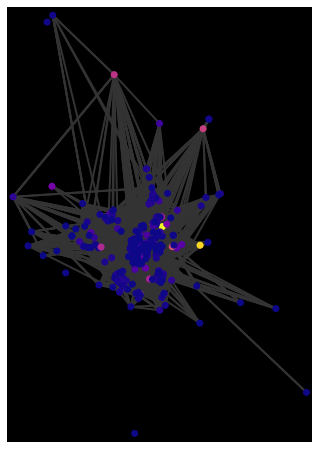

In [30]:
# plot the graph, coloring nodes by in_degree centrality
nc = ox.plot.get_node_colors_by_attr(MG, "in_degree", cmap="plasma")
fig, ax = ox.plot_graph(
    MG, bgcolor="k", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333"
)

In [31]:
#ox.save_graph_shapefile(MG, filepath="./graph_shapefile/")
#ox.save_graph_geopackage(MG, filepath="./graph.gpkg")
#ox.save_graphml(MG, filepath="./graph.graphml")

In [32]:
#MG.nodes(data=True)

In [33]:
#convert the graph into a directed graph by counting the edges
DG = nx.DiGraph()
for u,v,data in MG.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if DG.has_edge(u,v):
        DG[u][v]['weight'] += w
    else:
        DG.add_edge(u, v, weight=w)

nx.set_node_attributes(DG,values=dict(m_df.Latitude), name='y')
nx.set_node_attributes(DG,values=dict(m_df.Longitude), name='x') 

# We had gotten in/out degree centralities above when analyzing the multigraph
nx.set_node_attributes(DG,values=out_degree, name='out_degree')
nx.set_node_attributes(DG,values=in_degree, name='in_degree')




# Shapely Point and LineString
for n in DG.nodes:
    DG.nodes[n]['geometry']=Point(DG.nodes[n]['x'],DG.nodes[n]['y'])

for e in DG.edges:
    DG.edges[e]['geometry']=LineString([DG.nodes[e[0]]['geometry'],DG.nodes[e[1]]['geometry']])

DG.graph['crs']='epsg:4326'

DG.graph['crs']

'epsg:4326'

In [34]:
len(DG.edges)

5982

In [35]:
DG.remove_edges_from(nx.selfloop_edges(DG))

In [36]:
DG

In [37]:
len(DG.nodes)

286

In [38]:
# Get G egdes to dataframe
edge_df = nx.to_pandas_edgelist(DG) 

# Transform networkx nodes to dataframe
nodelist = list(DG.nodes(data=True)) # From G to list
node_df = pd.DataFrame(nodelist, columns=['vertex', 'attribute']) # From list to DF
node_df['geometry'] = [Point(row['attribute']['x'], row['attribute']['y']) for i,row in node_df.iterrows()]
node_df['in_degree']=[n['in_degree'] for n in node_df['attribute'] ]
node_df['out_degree']=[n['out_degree'] for n in node_df['attribute'] ]  
node_df = node_df.drop('attribute', 1)   
    
# Convert dfs into geodataframe
edge_df=gpd.GeoDataFrame(edge_df, crs="EPSG:4326", geometry=edge_df['geometry'])
node_df=gpd.GeoDataFrame(node_df, crs="EPSG:4326", geometry=node_df['geometry'])

/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/var/folders/bs/8_rscwxd25z1bcq4d89vsz380000gn/T/ipykernel_40007/2103810375.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  node_df = node_df.drop('attribute', 1)


In [44]:

node_df.sort_values('out_degree', ascending=False).head()

,geometry,in_degree,out_degree
vertex,,,
ebbeabd8-0201-4af9-b9fa-a997abcb6bfb,POINT (6.94467 50.93899),5104.0,7795.0
a3541dbc-85f8-4ccd-8f5b-801ae99869b8,POINT (6.96179 50.94843),7118.0,7448.0
791b56e7-ac51-432f-b75d-17d6556a42ae,POINT (6.99471 50.93822),6552.0,6510.0
e20e6c15-6507-4427-8b68-e1d1f870b924,POINT (6.93986 50.94564),4336.0,4915.0
74a627d5-9783-4c2b-87b1-f5aa3f617f19,POINT (6.96119 50.92230),3068.0,4138.0


<AxesSubplot:>

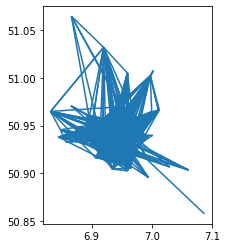

In [40]:
edge_df.plot()
#node_df.plot()

In [41]:
node_df.shape

(286, 4)

In [42]:
node_df=node_df.set_index('vertex')

In [90]:
#save the geodataframes into geojson

node_df.to_file("nx_node_df.geojson", driver='GeoJSON')
edge_df.to_file("nx_edge_df.geojson", driver='GeoJSON')

/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
